# **Support Vector Machine**  
In this assignment, we will train a classifier using Support Vector Machine (SVM) to predict whether a breast tumor is benign (0) or malignant (1).  
We will use the Breast Cancer Wisconsin dataset, built into sklearn.datasets. The dataset contains 569 
samples of breast tumors, with 30 numerical features

# **Import Necessary Libraries & Load the Dataset**

In [4]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Import necessary libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_selection import SelectFromModel
%matplotlib inline
from sklearn.datasets import load_breast_cancer

# Load the breast cancer dataset
data = load_breast_cancer()

# Convert dataset into a pandas DataFrame
df_cancer = pd.DataFrame(data.data, columns=data.feature_names)
df_cancer['target'] = data.target  # Add the target column for classification labels

# Display the first few rows of the dataset
print("Dataset Preview:")
display(df_cancer.head())


Dataset Preview:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### Check for Missing Values

In [5]:
# Check for missing values
print("\nMissing Values:")
print(df_cancer.isnull().sum())

print(f"Dataset Shape: {df_cancer.shape}")  # (rows, columns)



Missing Values:
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64
Dataset Shape: (569, 31)


### Visualizing Target Distribution

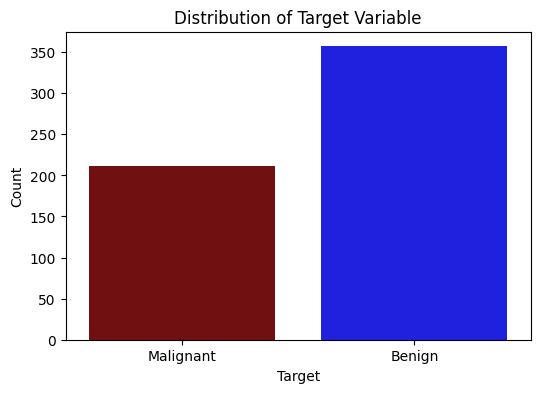

In [6]:
# Distribution of target variable
plt.figure(figsize=(6, 4))
sns.countplot(x=df_cancer['target'], palette=['maroon', 'blue'])
plt.title("Distribution of Target Variable")
plt.xlabel("Target")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=['Malignant', 'Benign'])
plt.show()

### Feature Distributions

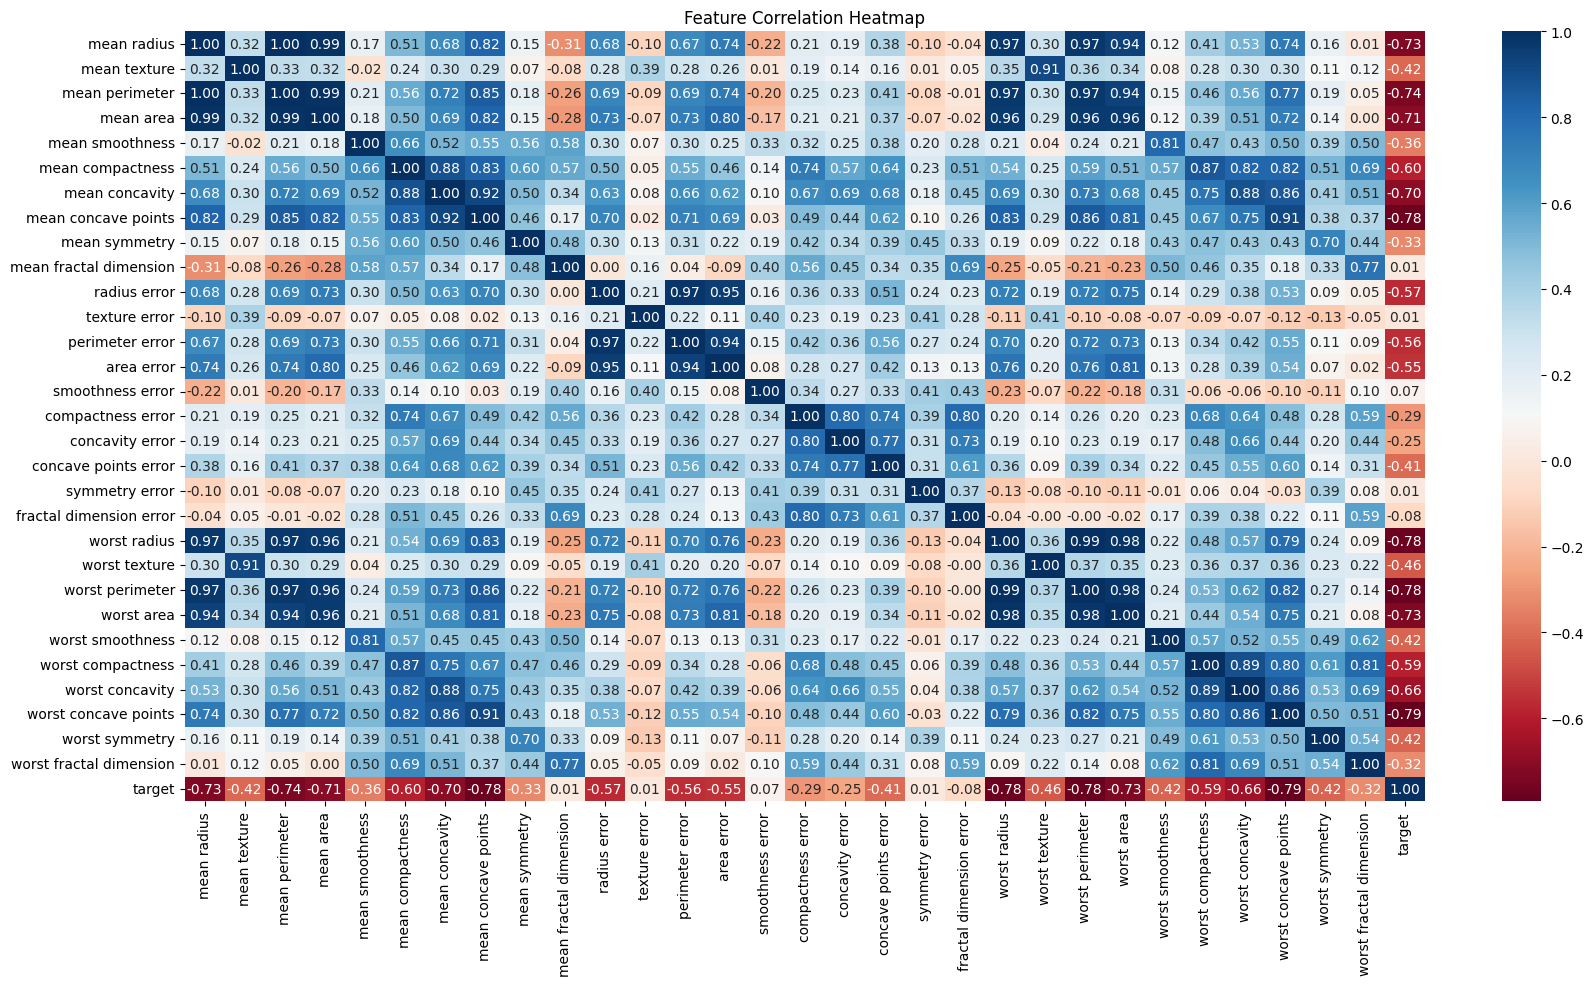

In [7]:
# Correlation heatmap
plt.figure(figsize=(20, 10)) 
sns.heatmap(df_cancer.corr(), annot=True, cmap="RdBu", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# **Data Preprocessing**

In [8]:
X = df_cancer.drop(['target'], axis=1)
y = df_cancer['target']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


# **Training of the SVM Model**

Training Accuracy (SVM): 0.9824
Testing Accuracy (SVM): 0.9766


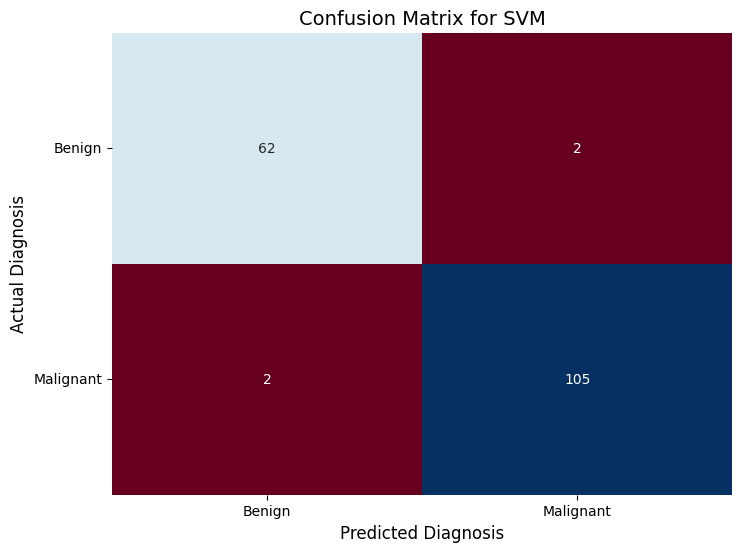


Classification Report (SVM):
               precision    recall  f1-score   support

   malignant     0.9688    0.9688    0.9688        64
      benign     0.9813    0.9813    0.9813       107

    accuracy                         0.9766       171
   macro avg     0.9750    0.9750    0.9750       171
weighted avg     0.9766    0.9766    0.9766       171

False Alarm Rate (FAR): 0.0312


In [9]:
# Define and train the SVM model
svm_model = SVC()
svm_model.fit(x_train, y_train)

# Make predictions for both training and testing sets
y_train_pred = svm_model.predict(x_train)
y_test_pred = svm_model.predict(x_test)

# Calculate training and testing accuracy
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# Print accuracy results
print(f"Training Accuracy (SVM): {train_acc:.4f}")
print(f"Testing Accuracy (SVM): {test_acc:.4f}")

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
tn, fp, fn, tp = conf_matrix.ravel()

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="RdBu", cbar=False)
plt.xlabel("Predicted Diagnosis", fontsize=12)
plt.ylabel("Actual Diagnosis", fontsize=12)
plt.xticks(ticks=[0.5, 1.5], labels=["Benign", "Malignant"])
plt.yticks(ticks=[0.5, 1.5], labels=["Benign", "Malignant"], rotation=0)
plt.title("Confusion Matrix for SVM", fontsize=14)
plt.show()

# Print classification report
print("\nClassification Report (SVM):\n", classification_report(y_test, y_test_pred, target_names=data.target_names, digits=4))

# Compute and display False Alarm Rate (FAR)
false_alarm_rate = fp / (fp + tn) if (fp + tn) != 0 else 0
print(f"False Alarm Rate (FAR): {false_alarm_rate:.4f}")


# **Hyperparameter Tuning using GridSearchCV**

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best Hyperparameters (cv=5): {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Training Accuracy (cv=5): 0.9799
Testing Accuracy (cv=5): 0.9708
False Alarm Rate (FAR, cv=5): 0.0625


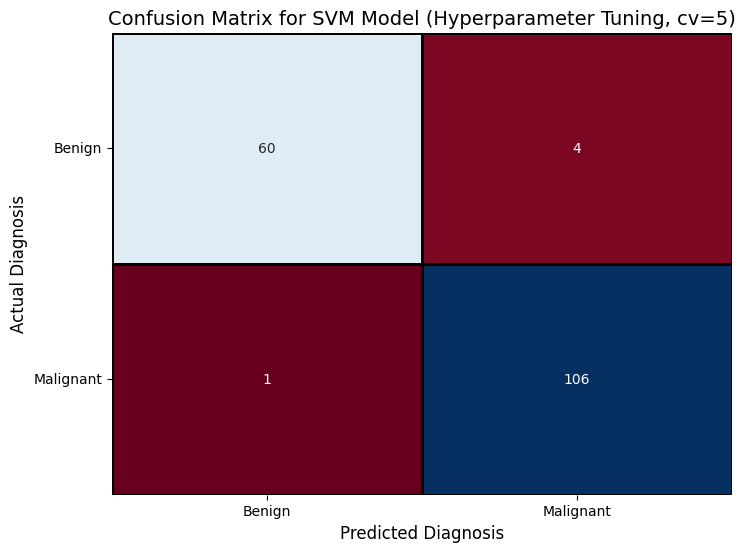


Classification Report (Hyperparameter Tuning, cv=5):
               precision    recall  f1-score   support

   malignant     0.9836    0.9375    0.9600        64
      benign     0.9636    0.9907    0.9770       107

    accuracy                         0.9708       171
   macro avg     0.9736    0.9641    0.9685       171
weighted avg     0.9711    0.9708    0.9706       171



In [10]:
# Hyperparameter tuning with GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],  
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],  
    'kernel': ['linear', 'rbf', 'poly']  
}

svm_model = SVC()
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(x_train, y_train)

# Get best hyperparameters and train the model
best_params = grid_search.best_params_
print("Best Hyperparameters (cv=5):", best_params)

best_svm = SVC(**best_params)
best_svm.fit(x_train, y_train)

# Predictions
y_train_pred = best_svm.predict(x_train)
y_test_pred = best_svm.predict(x_test)

# Accuracy calculation
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

# Print accuracy results
print(f"Training Accuracy (cv=5): {train_acc:.4f}")
print(f"Testing Accuracy (cv=5): {test_acc:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
tn, fp, fn, tp = conf_matrix.ravel()

# Compute and display False Alarm Rate (FAR)
false_alarm_rate = fp / (fp + tn) if (fp + tn) != 0 else 0
print(f"False Alarm Rate (FAR, cv=5): {false_alarm_rate:.4f}")

# Plot confusion matrix (same as before)
plt.figure(figsize=(8, 6))  # Adjusted to match previous size
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="RdBu", cbar=False, linewidths=1, linecolor="black")
plt.xlabel("Predicted Diagnosis", fontsize=12)
plt.ylabel("Actual Diagnosis", fontsize=12)
plt.xticks(ticks=[0.5, 1.5], labels=["Benign", "Malignant"])
plt.yticks(ticks=[0.5, 1.5], labels=["Benign", "Malignant"], rotation=0)
plt.title("Confusion Matrix for SVM Model (Hyperparameter Tuning, cv=5)", fontsize=14)
plt.show()

# Classification report
print("\nClassification Report (Hyperparameter Tuning, cv=5):\n", classification_report(y_test, y_test_pred, target_names=data.target_names, digits=4))


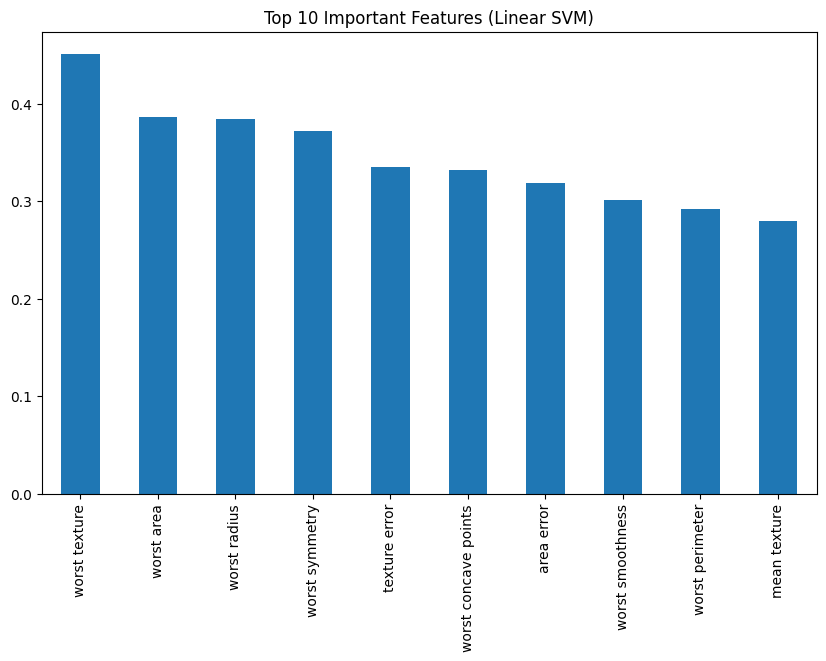

In [11]:
if best_svm.kernel == 'linear':
    feature_importances = pd.Series(
        np.abs(best_svm.coef_[0]), 
        index=X.columns  # Use X.columns here for the feature names
    ).sort_values(ascending=False)
    
    plt.figure(figsize=(10, 6))
    feature_importances.head(10).plot(kind='bar')
    plt.title("Top 10 Important Features (Linear SVM)")
    plt.show()

else:
    print(f"Feature importance is based on model's performance for {best_svm.kernel} kernel.")

## Train an SVM model using the most important features.

Most Important Features: ['mean compactness', 'mean concavity', 'texture error', 'area error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst concavity', 'worst concave points']
Accuracy with Selected Features: 0.9708

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.94      0.96        64
           1       0.96      0.99      0.98       107

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171

False Alarm Rate: 0.0625


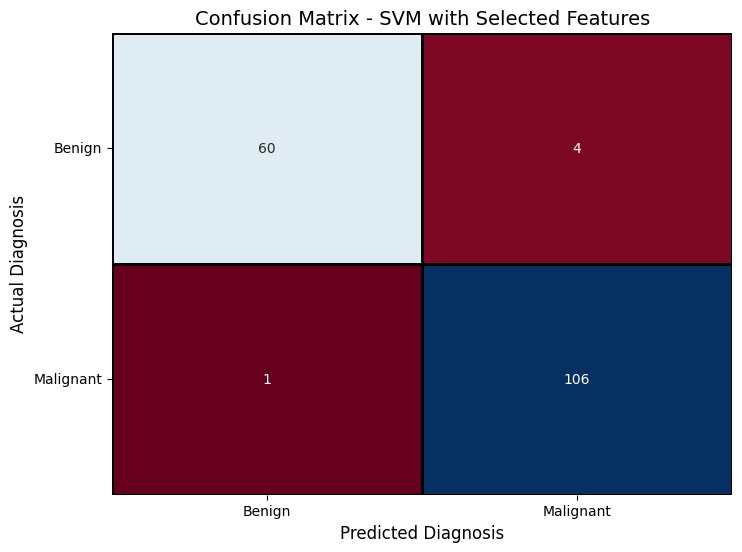

In [12]:
# Load dataset and create dataframe
cancer_data = load_breast_cancer()
df_cancer = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)
df_cancer['target'] = cancer_data.target

# Split features and target
X_data = df_cancer.drop(columns=['target'])
y_data = df_cancer['target']

# Split the dataset into training and testing sets
X_train_data, X_test_data, y_train_data, y_test_data = train_test_split(X_data, y_data, test_size=0.3, stratify=y_data, random_state=42)

# Standardize the data
scaler_data = StandardScaler()
X_train_data = scaler_data.fit_transform(X_train_data)
X_test_data = scaler_data.transform(X_test_data)

# Initialize and train SVM with linear kernel
svm_model_data = SVC(kernel='linear', C=1, random_state=42)
svm_model_data.fit(X_train_data, y_train_data)

# Select the most important features using SelectFromModel
selector_data = SelectFromModel(svm_model_data, prefit=True)
X_train_selected_data = selector_data.transform(X_train_data)
X_test_selected_data = selector_data.transform(X_test_data)

# Get the selected features
selected_feature_names = X_data.columns[selector_data.get_support()]
print("Most Important Features:", list(selected_feature_names))

# Train a new SVM model using only the selected features
svm_selected_model = SVC(kernel='linear', C=1, random_state=42)
svm_selected_model.fit(X_train_selected_data, y_train_data)

# Make predictions with the selected features
y_pred_selected_model = svm_selected_model.predict(X_test_selected_data)

# Calculate accuracy
accuracy_selected = accuracy_score(y_test_data, y_pred_selected_model)
print(f"Accuracy with Selected Features: {accuracy_selected:.4f}")

# Display classification report
print("\nClassification Report:\n", classification_report(y_test_data, y_pred_selected_model))

# Compute False Alarm Rate (FAR) using confusion matrix values
conf_matrix_selected = confusion_matrix(y_test_data, y_pred_selected_model)
tn_selected, fp_selected, fn_selected, tp_selected = conf_matrix_selected.ravel()

false_alarm_rate_selected = fp_selected / (fp_selected + tn_selected) if (fp_selected + tn_selected) != 0 else 0
print(f"False Alarm Rate: {false_alarm_rate_selected:.4f}")


# Plot the confusion matrix for selected features
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_selected, annot=True, fmt="d", cmap="RdBu", cbar=False, linewidths=1, linecolor="black")
plt.xlabel("Predicted Diagnosis", fontsize=12)
plt.ylabel("Actual Diagnosis", fontsize=12)
plt.xticks(ticks=[0.5, 1.5], labels=["Benign", "Malignant"])
plt.yticks(ticks=[0.5, 1.5], labels=["Benign", "Malignant"], rotation=0)
plt.title("Confusion Matrix - SVM with Selected Features", fontsize=14)
plt.show()


# **Guide Questions**

### 1. How did you preprocess the dataset (feature scaling, handling missing values if any, etc.)? 

Feature Scaling: We used the StandardScaler from sklearn.preprocessing to standardize the feature data. This means that each feature was transformed to have a mean of 0 and a standard deviation of 1. This is important for SVM because SVM models are sensitive to the scale of the data.  

Handling Missing Values: The dataset we used (the breast cancer dataset) does not contain any missing values, so no removal of columns was done.  

Splitting the Data: We split the dataset into training and testing sets using train_test_split, ensuring that 30% of the data was kept aside for testing and the remaining 70% was used for training.

### 2. Why is it necessary to split the dataset into training and testing sets? 

Training the Model: The training set is used to train the model and learn the patterns in the data.  

Evaluating the Model: The testing set is used to evaluate the model's performance on unseen data, which helps assess how well the model generalizes to new data. Without a test set, we wouldn't be able to estimate how the model will perform in real-world applications.

### 3. What is the role of StandardScaler in SVM training? 

SVM models are sensitive to the scale of the data. Features with larger numerical ranges could dominate the training process if scaling isn't performed.  

Standardizing the data ensures that all features contribute equally to the model, leading to better model performance and faster convergence during training.

### 4. How does C affect the performance of an SVM model?

The parameter C controls the trade-off between achieving a low training error and a low testing error (generalization error):  

- High C value: The SVM will attempt to fit the training data as well as possible, potentially overfitting the data if C is too high.  
    
- Low C value: The SVM will allow some misclassifications in the training set but may result in a simpler decision boundary, which could improve generalization and reduce overfitting.

### 5. What is the purpose of the kernel function in SVM? 

The kernel function in SVM transforms the input data into a higher-dimensional space to make it easier to find a linear separating hyperplane. There are different types of kernel functions:

- Linear kernel: No transformation is applied, and the data is used as is.  

- Polynomial kernel: Maps the data to a higher-dimensional space using polynomial features.  

- RBF (Radial Basis Function) kernel: Uses Gaussian functions to create a decision boundary that can handle non-linear separation.

### 6. What were the best hyperparameters found using GridSearchCV?

The best Hyperparameters found was (cv=5): {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}

### 7. What is a confusion matrix, and how is it interpreted? 

A confusion matrix is a table that allows visualization of the performance of a classification model. It summarizes the correct and incorrect predictions made by the model in terms of:

- True positives (TP): Correctly predicted positive class.  

- True negatives (TN): Correctly predicted negative class.  

- False positives (FP): Incorrectly predicted positive class (Type I error).  

- False negatives (FN): Incorrectly predicted negative class (Type II error).

### 8. How are Precision, Recall, and F1-score calculated from the confusion matrix?

We used the classification_report to get those values from the confusion matrix.  

For manual calculations:
- **Precision**: The proportion of predicted positive cases that are actually positive.

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

- **Recall**: The proportion of actual positive cases that are correctly identified.

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

- **F1-score**: The harmonic mean of Precision and Recall, providing a balance between the two metrics.

$$
\text{F1-score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$


### 9. If the model does not perform well, what adjustments can be made to improve it?

If the model is underperforming, several adjustments can be made:

- Tune hyperparameters: Use techniques like GridSearchCV or RandomizedSearchCV to find the best combination of parameters, such as C, gamma, and kernel.  

- Feature selection: Remove irrelevant or redundant features using methods like SelectFromModel to reduce overfitting and improve performance.  

- Data preprocessing: Investigate the dataset for issues like class imbalance and apply techniques like oversampling or undersampling to address it.  

- Try different kernels: If using a linear kernel, switching to a non-linear kernel like RBF or polynomial might improve performance on non-linear data.  

- Increase training data: More data may help the model generalize better and improve its performance.

# **Conclusion**

In this assignment, we trained a Support Vector Machine (SVM) classifier to predict whether a breast tumor is benign or malignant using the Breast Cancer Wisconsin dataset. The dataset, which contains 569 samples and 30 numerical features, was preprocessed by normalizing the feature values using StandardScaler to ensure better SVM performance.

The dataset was split into training and testing sets, with 70% of the data used for training and 30% for testing, ensuring the class distribution was maintained using stratification. We trained an SVM model and performed hyperparameter tuning using GridSearchCV to optimize key parameters like C (regularization parameter), Gamma (kernel coefficient), and Kernel type (linear, RBF, and polynomial).

Evaluation metrics, including training and testing accuracy, confusion matrix, precision, recall, F1-score, and false alarm rate (FAR), were calculated to assess the model's performance. Additionally, the most important features were identified using SelectFromModel to understand which variables had the most influence on the prediction.

The results demonstrate the effectiveness of SVM in classifying benign and malignant tumors with a high level of accuracy. Adjustments such as refining hyperparameters or exploring different kernels could further enhance the model's performance. This assignment provided a comprehensive understanding of applying SVM to real-world classification problems, offering valuable insights into model tuning and evaluation.